# Introdução

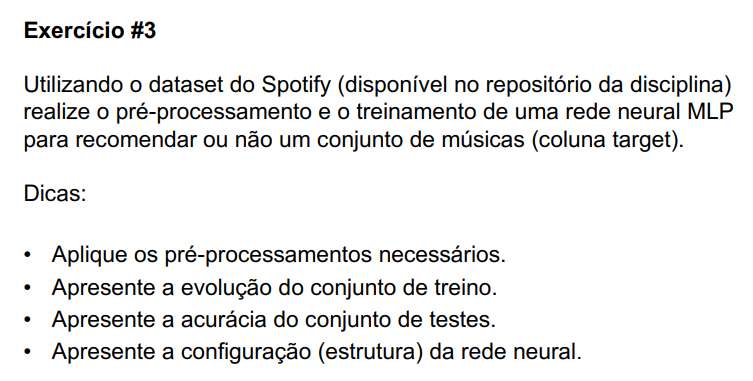

# Bicliotecas e Funções

In [284]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import torch

In [8]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [6]:
gpu_temp

NameError: name 'gpu_temp' is not defined

In [3]:


torch.cuda.is_available()

False

In [285]:
pd.options.display.float_format = '{:.2f}'.format

# Código

In [286]:
df = pd.read_csv('https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/deep%20learning%20I/spotfy/DadosSpotify.csv')
df.drop(columns=['id'], inplace=True)
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01,0.83,204600,0.43,0.02,2,0.17,-8.79,1,0.43,150.06,4.00,0.29,1,Mask Off,Future
1,0.20,0.74,326933,0.36,0.01,1,0.14,-10.40,1,0.08,160.08,4.00,0.59,1,Redbone,Childish Gambino
2,0.03,0.84,185707,0.41,0.00,2,0.16,-7.15,1,0.29,75.04,4.00,0.17,1,Xanny Family,Future
3,0.60,0.49,199413,0.34,0.51,5,0.09,-15.24,1,0.03,86.47,4.00,0.23,1,Master Of None,Beach House
4,0.18,0.68,392893,0.56,0.51,5,0.44,-11.65,0,0.07,174.00,4.00,0.90,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00,0.58,274404,0.93,0.00,1,0.13,-3.50,1,0.33,74.98,4.00,0.21,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.09,0.89,182182,0.89,0.00,1,0.05,-2.66,1,0.13,110.04,4.00,0.87,0,Candy,Dillon Francis
2014,0.01,0.64,207200,0.94,0.00,0,0.21,-2.47,1,0.11,150.08,4.00,0.47,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00,0.56,185600,0.99,0.68,1,0.09,-2.73,1,0.13,150.01,4.00,0.62,0,First Contact,Twin Moons


In [287]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00
mean,0.19,0.62,246306.20,0.68,0.13,5.34,0.19,-7.09,0.61,0.09,121.60,3.97,0.50,0.51
std,0.26,0.16,81981.81,0.21,0.27,3.65,0.16,3.76,0.49,0.09,26.69,0.26,0.25,0.50
min,0.00,0.12,16042.00,0.01,0.00,0.00,0.02,-33.10,0.00,0.02,47.86,1.00,0.03,0.00
25%,0.01,0.51,200015.00,0.56,0.00,2.00,0.09,-8.39,0.00,0.04,100.19,4.00,0.29,0.00
50%,0.06,0.63,229261.00,0.71,0.00,6.00,0.13,-6.25,1.00,0.05,121.43,4.00,0.49,1.00
75%,0.27,0.74,270333.00,0.85,0.05,9.00,0.25,-4.75,1.00,0.11,137.85,4.00,0.69,1.00
max,0.99,0.98,1004627.00,1.00,0.98,11.00,0.97,-0.31,1.00,0.82,219.33,5.00,0.99,1.00


In [288]:
1004627.00/1000/60 # 16.743783333333333
# a música mais longa tem quase 17min, talvez sejá um outlier indesejável

16.743783333333333

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

## Correlação

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_12784\2893186402.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_12784\2893186402.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'duration_ms'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'key'),
 Text(6.5, 0, 'liveness'),
 Text(7.5, 0, 'loudness'),
 Text(8.5, 0, 'mode'),
 Text(9.5, 0, 'speechiness'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature'),
 Text(12.5, 0, 'valence'),
 Text(13.5, 0, 'target')]

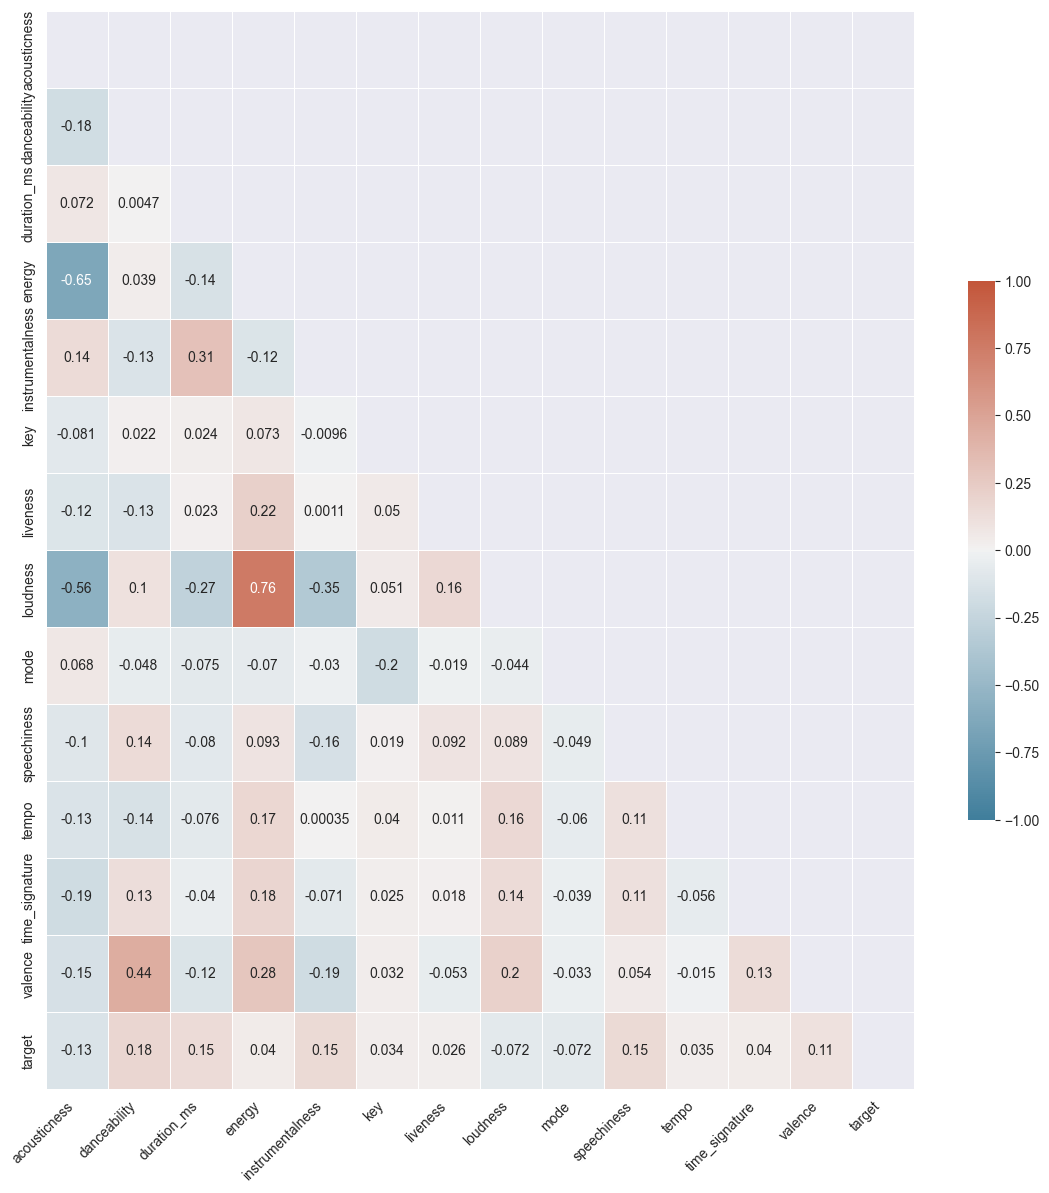

In [290]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (14, 14))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Sem nenhuma variável com alta correlçação com a target!

## Plots

In [291]:
continous_features = list(set(df.columns) - set(['target']) - set(['artist']) - set(['song_title']))
continous_features

['tempo',
 'speechiness',
 'valence',
 'key',
 'loudness',
 'mode',
 'acousticness',
 'instrumentalness',
 'liveness',
 'danceability',
 'time_signature',
 'duration_ms',
 'energy']

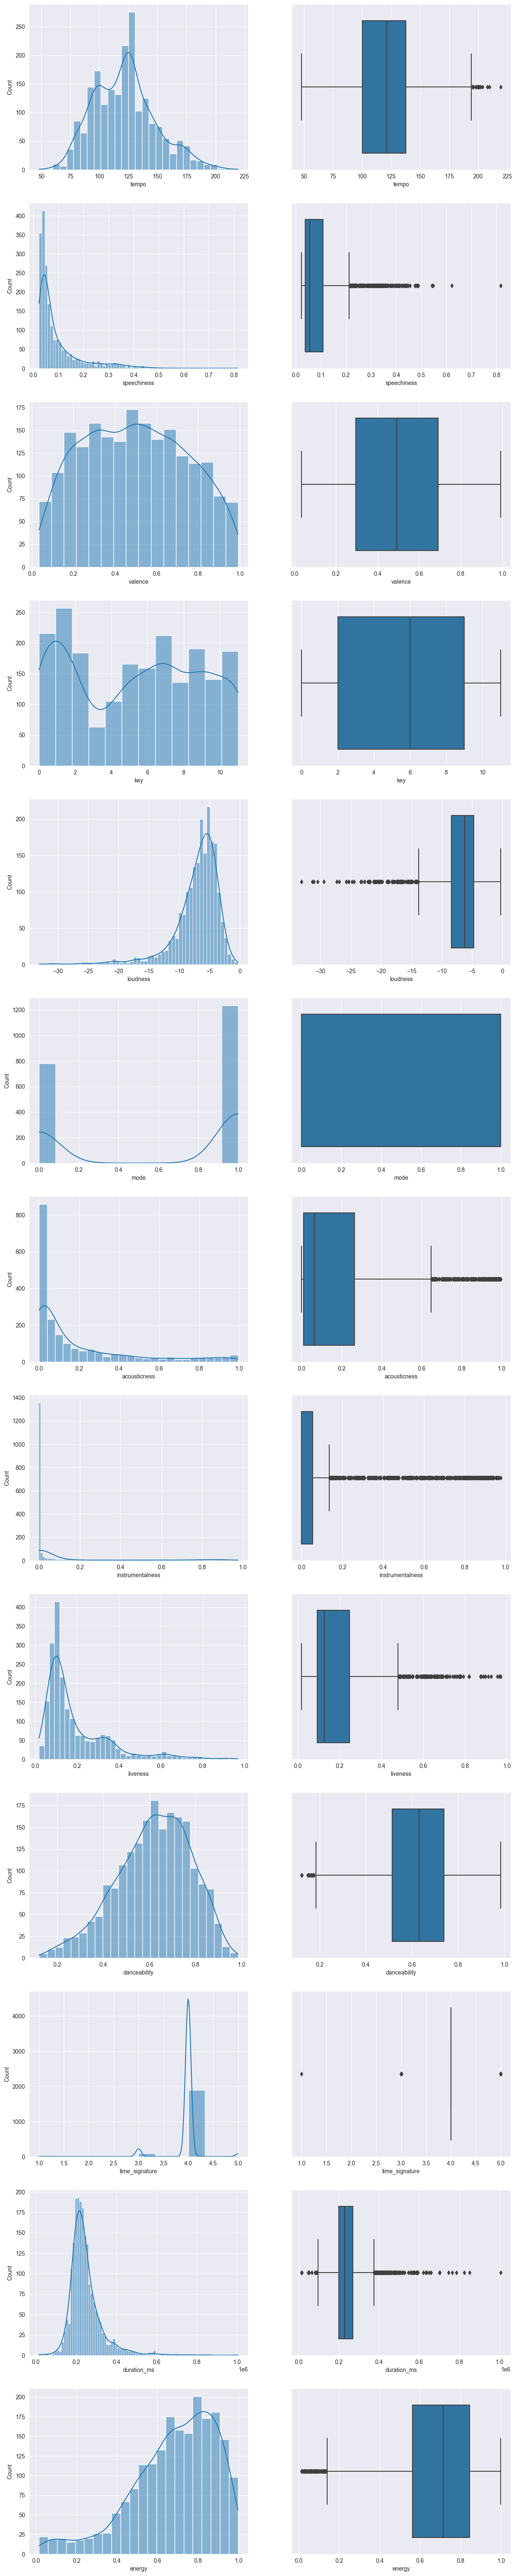

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [292]:
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(15, 80))
for i in range(len(continous_features)):
    feature = continous_features[i]
    plt.figure(figsize = (5, 5))
    data=df.copy()
    
    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    sns.boxplot(x=data[feature], ax=axes[i][1])

# Outliers

Os gráficos boxplot demonstram que existem uma grande quantidade de outliers, diminuindo a saúde do dataset para o treinamento.

## Tratamento outliers

In [172]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for column in df.loc[:,:'target'].columns:
    if 1==1:
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

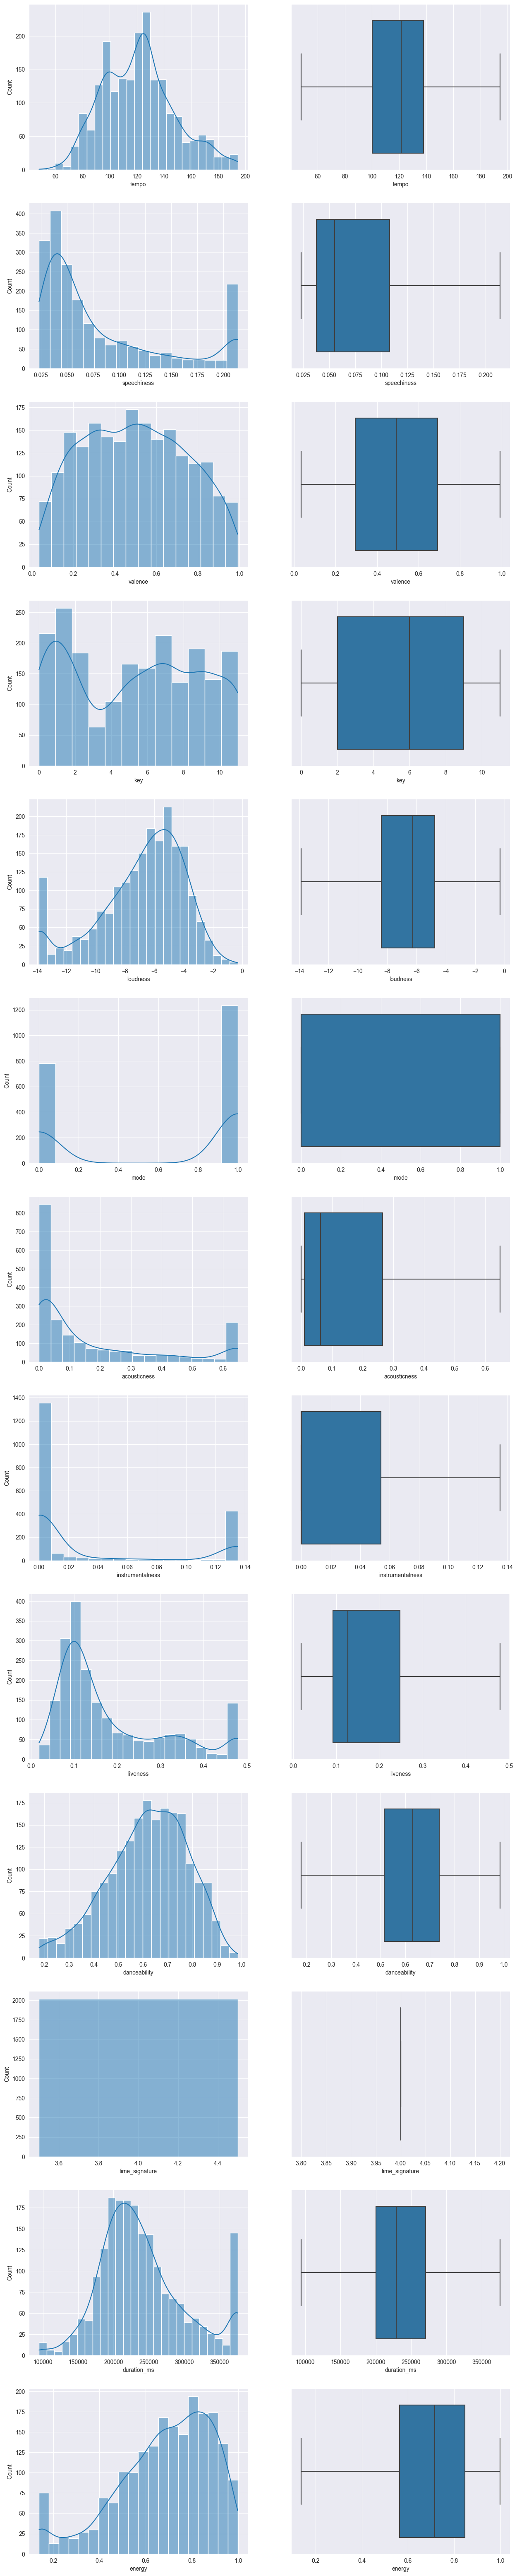

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [173]:
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(15, 80))
for i in range(len(continous_features)):
    feature = continous_features[i]
    plt.figure(figsize = (5, 5))
    data=df.copy()
    
    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    sns.boxplot(x=data[feature], ax=axes[i][1])

## Split Train Test

split it into training and testing sets

In [293]:
df = df.drop(columns=['artist','song_title'])

In [294]:
# split the data into features and target
X = df.drop("target", axis=1)
y = df["target"]


In [295]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will then standardize the data using StandardScaler

In [296]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [297]:
epochs = 100

## Modelo 0

In [279]:
# build the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [280]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 32)                448       
                                                                 
 dense_45 (Dense)            (None, 32)                1056      
                                                                 
 dense_46 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [281]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

This code loads the data from a CSV file, splits it into training and test sets, standardizes the data (to center it around 0 and scale the features to have a unit variance), defines a neural network with two hidden layers and an output layer, compiles the model with appropriate loss function and optimizer, then trains the model with the training data and validating on the test data with 100 iteration.

You should also consider adding callbacks like ModelCheckpoint, EarlyStopping to handle overfitting and achieve better results.

In [282]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
 1/26 [>.............................] - ETA: 12s - loss: 0.7168 - accuracy: 0.5156
Epoch 1: val_loss improved from inf to 0.66561, saving model to model.h5
26/26 [==============================] - 1s 9ms/step - loss: 0.6788 - accuracy: 0.5896 - val_loss: 0.6656 - val_accuracy: 0.5990
Epoch 2/100
 1/26 [>.............................] - ETA: 0s - loss: 0.6782 - accuracy: 0.5469
Epoch 2: val_loss improved from 0.66561 to 0.64553, saving model to model.h5
26/26 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.6336 - val_loss: 0.6455 - val_accuracy: 0.6188
Epoch 3/100
 1/26 [>.............................] - ETA: 0s - loss: 0.6195 - accuracy: 0.7188
Epoch 3: val_loss improved from 0.64553 to 0.63225, saving model to model.h5
26/26 [==============================] - 0s 3ms/step - loss: 0.6065 - accuracy: 0.6677 - val_loss: 0.6322 - val_accuracy: 0.6510
Epoch 4/100
 1/26 [>.............................] - ETA: 0s - loss: 0.5848 - accuracy: 0.7656
Epoch

In [283]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       206
           1       0.77      0.72      0.74       198

    accuracy                           0.75       404
   macro avg       0.76      0.75      0.75       404
weighted avg       0.76      0.75      0.75       404



ModelCheckpoint callback is used to save the model with the best performance during training, based on a certain metric such as validation loss or accuracy. It will save only the best model with the filepath='model.h5' name and it will only save the best version by using save_best_only=True and the verbose=1 show some message during the training time

EarlyStopping callback is used to stop training early when the model stops improving, based on a certain metric such as validation loss or accuracy, patience=10 means if the model didn’t improve after 10 epochs, then training will be stopped.

These callbacks can help prevent overfitting and save computational resources by stopping training early when performance on a validation set stops improving.

### Resumo

1. Import necessary libraries such as numpy, pandas, sklearn and tensorflow.

2. Load the data from a CSV file using pandas and split it into features and target.

3. Split the data into training and test sets using the train_test_split function from scikit-learn.

4. Standardize the data using StandardScaler from scikit-learn.

5. Define a neural network model using the Keras Sequential API. The model has two hidden layers with 32 units each and relu activation functions, and an output layer with one unit and a sigmoid activation function.

6. Compile the model with Adam optimizer and binary crossentropy loss function and accuracy as metrics

7. Train the model using the training data and validate it on the test data with 100 iteration, also added two callbacks, ModelCheckpoint and EarlyStopping to handle overfitting and achieve better results

8. Load the model using keras.models.load_model("model.h5") function

9. Use the loaded model to make predictions on new data, evaluate its performance on a test set, or continue training it further.

10. Scale new data using the same scaler object and use the predict() or predict_classes() method to get the predicted label or class respectively.

### Melhorias

1. Collect more data: A larger and more diverse training set can help the model generalize better and improve its performance.

2. Feature Engineering: You can try to extract more meaningful features from the data, or combine existing features in new ways to improve the model's ability to learn from the data.

3. Try different architectures and hyperparameters: You can experiment with different neural network architectures and different hyperparameters such as the number of layers, number of units in each layer, activation functions and so on. This can be done using GridSearchCV, RandomSearchCV from sklearn.

4. Regularization: Regularization techniques like dropout, L1, L2 can help to prevent overfitting and improve the generalization of the model.

5. Data augmentation: This can help the model to learn new features from the same data by applying random transformations, rotations, and so on.

6. Transfer Learning: You can use a pre-trained model and fine-tune it on your dataset to leverage knowledge from similar tasks.

7. Ensemble methods: It is a technique where multiple models are used to solve a single problem, such as bagging, boosting, and stacking. This can improve the overall performance of the model by reducing overfitting and variance.

Keep in mind that different techniques will be more or less effective depending on the specific dataset and problem you are working on. The best way to improve performance is to experiment with different techniques and see what works best for your specific use case.

### GridSearchCV

GridSearchCV to search for the best neural network architecture and hyperparameters for your dataset:

In [298]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

# define the model
def create_model(num_layers=1, num_units=32, activation='relu', lr=0.01):
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# create the wrapper
model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)

# define the grid search parameters
params = {'num_layers': [1, 2, 3], 'num_units': [16, 32, 64, 128, 256], 'activation': ['relu', 'tanh', 'sigmoid'], 'lr': [0.0001, 0.001, 0.01, 0.1, 1]}

# create the grid search
grid = GridSearchCV(estimator=model_wrapper, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

earlystopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [earlystopper]

# fit the grid search
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks)

# summarize the results
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_12784\542451622.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)


In [ ]:
y_pred = grid_result.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 0s 992us/step
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79       206
         1.0       0.80      0.74      0.77       198

    accuracy                           0.78       404
   macro avg       0.78      0.78      0.78       404
weighted avg       0.78      0.78      0.78       404



This will save the best model during the grid search process using the ModelCheckpoint callback and it will stop training early when the model stops improving using the EarlyStopping callback.

The fit method of the KerasClassifier wrapper will automatically call the fit method of the underlying model with the appropriate training and validation data for each fold of cross-validation, including any callbacks that are passed to it. This allows the callbacks to be used during the grid search process, so that you can save the best performing model and stop the training early in an automated way.

By doing this, you will have access to the best model even after the GridSearchCV has finished its execution and you can use it for further predictions.

This code uses the GridSearchCV function to search for the best combination of hyperparameters for the create_model function, which is a neural network with the specified number of layers, number of units in each layer, and activation function. GridSearchCV will train and evaluate the model on the training data using k-fold cross-validation, with k=5, and will return the combination of hyperparameters that performed best on the validation set.
The GridSearchCV function uses the KerasClassifier wrapper to allow the use of Keras models with scikit-learn's API, n_jobs=-1 is used to use all the available CPU cores to parallelize the computation.

Please note that this code is just an example to give an idea of how GridSearchCV can be used. You should adjust the parameter grid and the neural network architecture to suit your specific dataset and problem. Also keep in mind that this can be a computationally expensive process and might take a long time to run, and that using RandomSearchCV is a good alternative as it perform better on large scale problems.

Here, we defined a parameter grid that includes different numbers of hidden layers, batch size, epochs and optimizer. The GridSearchCV object is then created with the specified parameter grid, and the data is fit to the model using the fit() method.

It will perform an exhaustive search over the specified parameter grid. And for each combination of parameters, it will train the model using k-fold cross-validation (in this case k=3) and then it will output the best parameters and the best score(accuracy or loss)

It's worth noting that GridSearchCV can be computationally expensive, especially when the number of combination of hyperparameters increases, another alternative is RandomizedSearchCV that samples a given number of random combinations of hyperparameters, it's less computational expensive but it's less likely to find the optimal combination of hyperparameters.

## Modelo 1

Next, we will build our MLP neural network using Keras. We will start by defining the model as a Sequential model, and then adding two hidden layers with 64 and 32 units respectively

{'activation': 'sigmoid', 'lr': 0.0001, 'num_layers': 1, 'num_units': 64}

In [263]:
# Define the model
model = Sequential()

# Add the hidden layers
model.add(Dense(units=64, activation='sigmoid', input_dim=X_train.shape[1]))
# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                896       
                                                                 
 dense_43 (Dense)            (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


To train the model, we will use the fit method, passing in our training data and labels, and specifying the number of epochs and the batch size

In [264]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/1000
36/51 [====================>.........] - ETA: 0s - loss: 0.7041 - accuracy: 0.5165 
Epoch 1: val_loss improved from inf to 0.67914, saving model to model.h5
51/51 [==============================] - 1s 5ms/step - loss: 0.6953 - accuracy: 0.5474 - val_loss: 0.6791 - val_accuracy: 0.5792
Epoch 2/1000
37/51 [====================>.........] - ETA: 0s - loss: 0.6552 - accuracy: 0.6410
Epoch 2: val_loss improved from 0.67914 to 0.65519, saving model to model.h5
51/51 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.6392 - val_loss: 0.6552 - val_accuracy: 0.6337
Epoch 3/1000
36/51 [====================>.........] - ETA: 0s - loss: 0.6362 - accuracy: 0.6753
Epoch 3: val_loss improved from 0.65519 to 0.64243, saving model to model.h5
51/51 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6689 - val_loss: 0.6424 - val_accuracy: 0.6559
Epoch 4/1000
36/51 [====================>.........] - ETA: 0s - loss: 0.6179 - accuracy: 0.6866
E

In [203]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 0s 953us/step
              precision    recall  f1-score   support

         0.0       0.76      0.77      0.77       206
         1.0       0.76      0.75      0.75       198

    accuracy                           0.76       404
   macro avg       0.76      0.76      0.76       404
weighted avg       0.76      0.76      0.76       404



Finally, we can evaluate the model on the testing data using the evaluate method

This should give us a full code for classifying healthy or not healthy using an MLP neural network on the UCI Heart Disease dataset

## Modelo 2
A recurrent neural network (RNN) with one LSTM layer

In [204]:
from tensorflow.keras.layers import LSTM

# Define the model
model = Sequential()

# Add the LSTM layer
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [205]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [206]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
43/51 [========================>.....] - ETA: 0s - loss: 0.6888 - accuracy: 0.5545
Epoch 1: val_loss improved from inf to 0.68383, saving model to model.h5
51/51 [==============================] - 3s 15ms/step - loss: 0.6869 - accuracy: 0.5567 - val_loss: 0.6838 - val_accuracy: 0.5743
Epoch 2/100
42/51 [=======================>......] - ETA: 0s - loss: 0.6754 - accuracy: 0.5766
Epoch 2: val_loss improved from 0.68383 to 0.67483, saving model to model.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6717 - accuracy: 0.5871 - val_loss: 0.6748 - val_accuracy: 0.5767
Epoch 3/100
43/51 [========================>.....] - ETA: 0s - loss: 0.6641 - accuracy: 0.6032
Epoch 3: val_loss did not improve from 0.67483
51/51 [==============================] - 0s 5ms/step - loss: 0.6676 - accuracy: 0.5964 - val_loss: 0.6751 - val_accuracy: 0.5718
Epoch 4/100
45/51 [=========================>....] - ETA: 0s - loss: 0.6627 - accuracy: 0.6042
Epoch 4: val_loss improved from 0.6

In [207]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       206
         1.0       0.69      0.66      0.68       198

    accuracy                           0.69       404
   macro avg       0.69      0.69      0.69       404
weighted avg       0.69      0.69      0.69       404



## Modelo 3
A hybrid neural network with one convolutional layer and one LSTM layer

In [208]:
from tensorflow.keras.layers import Conv1D, LSTM

# Define the model
model = Sequential()

# Add the convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add the LSTM layer
model.add(LSTM(units=32))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [209]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 32)            128       
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [210]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
44/51 [========================>.....] - ETA: 0s - loss: 0.6881 - accuracy: 0.5469
Epoch 1: val_loss improved from inf to 0.68021, saving model to model.h5
51/51 [==============================] - 3s 18ms/step - loss: 0.6875 - accuracy: 0.5518 - val_loss: 0.6802 - val_accuracy: 0.6015
Epoch 2/100
50/51 [============================>.] - ETA: 0s - loss: 0.6600 - accuracy: 0.6031
Epoch 2: val_loss improved from 0.68021 to 0.66216, saving model to model.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6616 - accuracy: 0.6007 - val_loss: 0.6622 - val_accuracy: 0.5941
Epoch 3/100
44/51 [========================>.....] - ETA: 0s - loss: 0.6456 - accuracy: 0.6229
Epoch 3: val_loss improved from 0.66216 to 0.66141, saving model to model.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6415 - accuracy: 0.6317 - val_loss: 0.6614 - val_accuracy: 0.5990
Epoch 4/100
45/51 [=========================>....] - ETA: 0s - loss: 0.6348 - accuracy: 0.6375
Epoch

In [211]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       206
         1.0       0.74      0.65      0.69       198

    accuracy                           0.72       404
   macro avg       0.72      0.72      0.72       404
weighted avg       0.72      0.72      0.72       404



## Modelo 4
A deep neural network (DNN) with three hidden layers

In [212]:
# Define the model
model = Sequential()

# Add the hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [213]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
42/51 [=======================>......] - ETA: 0s - loss: 0.6508 - accuracy: 0.6161 
Epoch 1: val_loss improved from inf to 0.63194, saving model to model.h5
51/51 [==============================] - 1s 6ms/step - loss: 0.6459 - accuracy: 0.6324 - val_loss: 0.6319 - val_accuracy: 0.6906
Epoch 2/100
42/51 [=======================>......] - ETA: 0s - loss: 0.5802 - accuracy: 0.7240
Epoch 2: val_loss improved from 0.63194 to 0.59749, saving model to model.h5
51/51 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.7179 - val_loss: 0.5975 - val_accuracy: 0.7153
Epoch 3/100
41/51 [=======================>......] - ETA: 0s - loss: 0.5384 - accuracy: 0.7439
Epoch 3: val_loss improved from 0.59749 to 0.57932, saving model to model.h5
51/51 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7353 - val_loss: 0.5793 - val_accuracy: 0.7228
Epoch 4/100
40/51 [======================>.......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7430
Epoch

In [214]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78       206
         1.0       0.78      0.74      0.76       198

    accuracy                           0.77       404
   macro avg       0.77      0.77      0.77       404
weighted avg       0.77      0.77      0.77       404



## Modelo 5
A recurrent neural network (RNN) with two LSTM layers:

In [215]:
from tensorflow.keras.layers import LSTM

# Define the model
model = Sequential()

# Add the LSTM layers
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(units=32))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [216]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
44/51 [========================>.....] - ETA: 0s - loss: 0.6819 - accuracy: 0.5646
Epoch 1: val_loss improved from inf to 0.68029, saving model to model.h5
51/51 [==============================] - 6s 25ms/step - loss: 0.6816 - accuracy: 0.5679 - val_loss: 0.6803 - val_accuracy: 0.5767
Epoch 2/100
46/51 [==========================>...] - ETA: 0s - loss: 0.6709 - accuracy: 0.5842
Epoch 2: val_loss did not improve from 0.68029
51/51 [==============================] - 0s 7ms/step - loss: 0.6672 - accuracy: 0.5921 - val_loss: 0.6861 - val_accuracy: 0.5594
Epoch 3/100
46/51 [==========================>...] - ETA: 0s - loss: 0.6726 - accuracy: 0.5917
Epoch 3: val_loss improved from 0.68029 to 0.67871, saving model to model.h5
51/51 [==============================] - 0s 7ms/step - loss: 0.6712 - accuracy: 0.5921 - val_loss: 0.6787 - val_accuracy: 0.5644
Epoch 4/100
46/51 [==========================>...] - ETA: 0s - loss: 0.6667 - accuracy: 0.5971
Epoch 4: val_loss improved from 0.6

In [217]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72       206
         1.0       0.72      0.63      0.67       198

    accuracy                           0.70       404
   macro avg       0.70      0.69      0.69       404
weighted avg       0.70      0.70      0.69       404



##  Modelo 6
A hybrid neural network with one convolutional layer, one LSTM layer, and one dense layer

In [218]:
from tensorflow.keras.layers import Conv1D, LSTM, Dense

# Define the model
model = Sequential()

# Add the convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add the LSTM layer
model.add(LSTM(units=32))

# Add the dense layer
model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [219]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
44/51 [========================>.....] - ETA: 0s - loss: 0.6903 - accuracy: 0.5263
Epoch 1: val_loss improved from inf to 0.68809, saving model to model.h5
51/51 [==============================] - 3s 15ms/step - loss: 0.6905 - accuracy: 0.5282 - val_loss: 0.6881 - val_accuracy: 0.5619
Epoch 2/100
44/51 [========================>.....] - ETA: 0s - loss: 0.6756 - accuracy: 0.5724
Epoch 2: val_loss improved from 0.68809 to 0.66599, saving model to model.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6720 - accuracy: 0.5772 - val_loss: 0.6660 - val_accuracy: 0.6064
Epoch 3/100
43/51 [========================>.....] - ETA: 0s - loss: 0.6523 - accuracy: 0.6068
Epoch 3: val_loss improved from 0.66599 to 0.65586, saving model to model.h5
51/51 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6169 - val_loss: 0.6559 - val_accuracy: 0.6188
Epoch 4/100
43/51 [========================>.....] - ETA: 0s - loss: 0.6396 - accuracy: 0.6337
Epoch

In [220]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75       206
         1.0       0.76      0.66      0.70       198

    accuracy                           0.73       404
   macro avg       0.73      0.73      0.73       404
weighted avg       0.73      0.73      0.73       404

